In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate

df = pd.read_csv("diabetes.csv")

In [ ]:
df.dtypes

Diabetes_012            float64
HighBP                    int64
HighChol                  int64
CholCheck               float64
BMI                     float64
Smoker                    int64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump       float64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                  int64
Sex                     float64
Age                       int64
Education               float64
Income                    int64
dtype: object

In [ ]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,1,1.0,40.0,1,0.0,0.0,0.0,0,...,1,0,5.0,18.0,15.0,1,0.0,9,4.0,3
1,0.0,0,0,0.0,25.0,1,0.0,0.0,1.0,0,...,0,1,3.0,0.0,0.0,0,0.0,7,6.0,1
2,NaN,1,1,1.0,28.0,0,0.0,0.0,0.0,1,...,1,1,5.0,30.0,30.0,1,0.0,9,4.0,8
3,0.0,1,0,1.0,27.0,0,0.0,0.0,1.0,1,...,1,0,2.0,0.0,0.0,0,0.0,11,3.0,6
4,0.0,1,1,1.0,24.0,0,0.0,0.0,1.0,1,...,1,0,2.0,3.0,0.0,0,0.0,11,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13867,0.0,1,0,1.0,32.0,0,0.0,0.0,0.0,1,...,1,0,3.0,0.0,0.0,0,1.0,9,6.0,8
13868,2.0,1,1,1.0,32.0,1,0.0,1.0,1.0,1,...,1,0,4.0,0.0,4.0,1,1.0,10,6.0,8
13869,0.0,0,0,1.0,24.0,1,0.0,0.0,1.0,1,...,1,0,3.0,15.0,2.0,0,0.0,5,6.0,8
13870,0.0,0,1,1.0,22.0,1,0.0,0.0,1.0,0,...,1,0,4.0,5.0,12.0,0,0.0,6,4.0,8


kiểm tra giá trị Nan

In [ ]:
def check_Nan_values(dataframe: pd.DataFrame):
    df_ac = dataframe.copy()
    count = 0
    for key in df_ac.keys():
        if df_ac[key].isnull().sum() > 0:
            print(key, df_ac[key].isnull().sum())
            count += 1
    if(count == 0):
        print("NA = none")


In [ ]:
check_Nan_values(dataframe=df)

Diabetes_012 6
CholCheck 3
BMI 1
Stroke 1
HeartDiseaseorAttack 2
PhysActivity 5
HvyAlcoholConsump 2
GenHlth 3
MentHlth 2
PhysHlth 2
Sex 7
Education 3


chuẩn hóa dữ liệu

In [ ]:
def normailize(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype != object and key!='Diabetes_012':
            min = df[key].min()
            max = df[key].max()
            df[key] = (df[key] - min)/(max-min)
            df[key] = df[key].round(decimals=4)
    return df

In [ ]:
df1 = normailize(dataframe=df)

In [ ]:
df1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.3662,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.00,0.6000,0.5000,1.0,0.0,0.6667,0.6,0.2857
1,0.0,0.0,0.0,0.0,0.1549,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0000,0.0000,0.0,0.0,0.5000,1.0,0.0000
2,NaN,1.0,1.0,1.0,0.1972,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.00,1.0000,1.0000,1.0,0.0,0.6667,0.6,1.0000
3,0.0,1.0,0.0,1.0,0.1831,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0000,0.0000,0.0,0.0,0.8333,0.4,0.7143
4,0.0,1.0,1.0,1.0,0.1408,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1000,0.0000,0.0,0.0,0.8333,0.8,0.4286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13867,0.0,1.0,0.0,1.0,0.2535,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.0000,0.0000,0.0,1.0,0.6667,1.0,1.0000
13868,2.0,1.0,1.0,1.0,0.2535,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.75,0.0000,0.1333,1.0,1.0,0.7500,1.0,1.0000
13869,0.0,0.0,0.0,1.0,0.1408,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.5000,0.0667,0.0,0.0,0.3333,1.0,1.0000
13870,0.0,0.0,1.0,1.0,0.1127,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.75,0.1667,0.4000,0.0,0.0,0.4167,0.6,1.0000


loại bỏ dòng trùng lặp

In [ ]:
df_check = df1.copy()
duplicates = df1[df1.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()
df1.drop_duplicates(inplace = True)
df1.shape

Duplicate Rows :  146


(13726, 22)

loại bỏ ngoại lai, tránh nhiễu

In [ ]:
def iqr_outliers(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if key != 'Diabetes_012':
            q1 = df[key].quantile(0.25)
            q3 = df[key].quantile(0.75)
            iqr = q3-q1
            Lower_tail = q1 - 1.5 * iqr
            Upper_tail = q3 + 1.5 * iqr
            if Lower_tail != Upper_tail:
                df = df.drop(df[df[key] > Upper_tail].index)
                df = df.drop(df[df[key] < Lower_tail].index)
            print(key)
            print(f"Lower_tail: {Lower_tail}")
            print(f"Upper_tail: {Upper_tail}")
            print("\n")
    return df

In [ ]:
df2 = iqr_outliers(dataframe = df1)

HighBP
Lower_tail: -1.5
Upper_tail: 2.5


HighChol
Lower_tail: -1.5
Upper_tail: 2.5


CholCheck
Lower_tail: 1.0
Upper_tail: 1.0


BMI
Lower_tail: -0.02824999999999997
Upper_tail: 0.42255


Smoker
Lower_tail: -1.5
Upper_tail: 2.5


Stroke
Lower_tail: 0.0
Upper_tail: 0.0


HeartDiseaseorAttack
Lower_tail: 0.0
Upper_tail: 0.0


PhysActivity
Lower_tail: -1.5
Upper_tail: 2.5


Fruits
Lower_tail: -1.5
Upper_tail: 2.5


Veggies
Lower_tail: 1.0
Upper_tail: 1.0


HvyAlcoholConsump
Lower_tail: 0.0
Upper_tail: 0.0


AnyHealthcare
Lower_tail: 1.0
Upper_tail: 1.0


NoDocbcCost
Lower_tail: 0.0
Upper_tail: 0.0


GenHlth
Lower_tail: -0.125
Upper_tail: 0.875


MentHlth
Lower_tail: -0.10005
Upper_tail: 0.16675


PhysHlth
Lower_tail: -0.10005
Upper_tail: 0.16675


DiffWalk
Lower_tail: 0.0
Upper_tail: 0.0


Sex
Lower_tail: -1.5
Upper_tail: 2.5


Age
Lower_tail: -0.08324999999999999
Upper_tail: 1.2499500000000001


Education
Lower_tail: -1.1102230246251565e-16
Upper_tail: 1.6


Income
Lower_tail: -0.071500

In [ ]:
df2

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,0.0,0.0,0.0,0.0,0.1549,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.0000,0.0,0.0,0.5000,1.0,0.0000
3,0.0,1.0,0.0,1.0,0.1831,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0000,0.0,0.0,0.8333,0.4,0.7143
4,0.0,1.0,1.0,1.0,0.1408,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.0000,0.0,0.0,0.8333,0.8,0.4286
5,0.0,1.0,1.0,1.0,0.1549,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0667,0.0,1.0,0.7500,1.0,1.0000
7,0.0,1.0,1.0,1.0,0.1549,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.0,0.0000,1.0,0.0,0.8333,0.6,0.4286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13865,0.0,0.0,0.0,1.0,0.2254,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.7500,1.0,1.0000
13866,0.0,1.0,0.0,1.0,0.1268,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.0000,1.0,0.0,0.5833,1.0,0.8571
13867,0.0,1.0,0.0,1.0,0.2535,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.0,0.0000,0.0,1.0,0.6667,1.0,1.0000
13868,2.0,1.0,1.0,1.0,0.2535,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.75,0.0,0.1333,1.0,1.0,0.7500,1.0,1.0000


set lại index bộ data

In [ ]:
def rest_index(dataframe: pd.DataFrame):
    a = dataframe.reset_index()
    b = a.drop('index', axis = 1)
    return b

In [ ]:
df4 = rest_index(dataframe = df2)
df4

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,0.1549,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.0000,0.0,0.0,0.5000,1.0,0.0000
1,0.0,1.0,0.0,1.0,0.1831,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0000,0.0,0.0,0.8333,0.4,0.7143
2,0.0,1.0,1.0,1.0,0.1408,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.0000,0.0,0.0,0.8333,0.8,0.4286
3,0.0,1.0,1.0,1.0,0.1549,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0667,0.0,1.0,0.7500,1.0,1.0000
4,0.0,1.0,1.0,1.0,0.1549,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.0,0.0000,1.0,0.0,0.8333,0.6,0.4286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487,0.0,0.0,0.0,1.0,0.2254,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.7500,1.0,1.0000
9488,0.0,1.0,0.0,1.0,0.1268,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.0000,1.0,0.0,0.5833,1.0,0.8571
9489,0.0,1.0,0.0,1.0,0.2535,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.0,0.0000,0.0,1.0,0.6667,1.0,1.0000
9490,2.0,1.0,1.0,1.0,0.2535,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.75,0.0,0.1333,1.0,1.0,0.7500,1.0,1.0000


điền các giá trị Nan

In [ ]:
def replace_Nan_data(dataframe: pd.DataFrame) -> pd.DataFrame:
    df_ac = dataframe.copy()
    for key in df_ac.keys():
        if df_ac[key].isnull().sum() > 0:
            df_ac[key].fillna(df_ac[key].value_counts().index.tolist()[0], inplace = True)
    return df_ac

In [ ]:
df5 = replace_Nan_data(dataframe = df4)

In [ ]:
check_Nan_values(dataframe=df5)

NA = none


In [ ]:
df5['Diabetes_012']= df5['Diabetes_012'].astype(int)
df5

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,0.0,0.0,0.1549,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.0000,0.0,0.0,0.5000,1.0,0.0000
1,0,1.0,0.0,1.0,0.1831,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0000,0.0,0.0,0.8333,0.4,0.7143
2,0,1.0,1.0,1.0,0.1408,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.0000,0.0,0.0,0.8333,0.8,0.4286
3,0,1.0,1.0,1.0,0.1549,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0667,0.0,1.0,0.7500,1.0,1.0000
4,0,1.0,1.0,1.0,0.1549,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.0,0.0000,1.0,0.0,0.8333,0.6,0.4286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487,0,0.0,0.0,1.0,0.2254,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.7500,1.0,1.0000
9488,0,1.0,0.0,1.0,0.1268,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.0000,1.0,0.0,0.5833,1.0,0.8571
9489,0,1.0,0.0,1.0,0.2535,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.0,0.0000,0.0,1.0,0.6667,1.0,1.0000
9490,2,1.0,1.0,1.0,0.2535,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.75,0.0,0.1333,1.0,1.0,0.7500,1.0,1.0000


Select Features

In [ ]:
target = 'Diabetes_012'
features = [x for x in df5.columns if x not in target]
print(features)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']



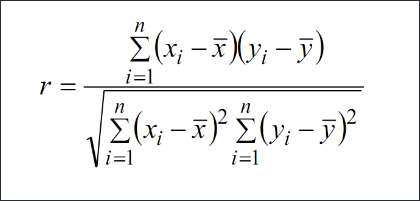

In [ ]:
def correlation(x, y):
    # tìm giá trị trung bình của x và y
    x_mean = sum(x)/float(len(x))
    y_mean = sum(y)/float(len(y))
    # Trừ phần tử trong chuỗi dữ liệu với giá trị trung bình
    sub_x = [i-x_mean for i in x]
    sub_y = [i-y_mean for i in y]
    # tìm hiệp phương sai của x và y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Độ lệch chuẩn của x và y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])

    denominator = (std_deviation_x*std_deviation_y)**0.5
    cor = numerator/denominator
    return cor

In [ ]:
corr = []
for i in features:
    corr.append(abs(correlation(df5['Diabetes_012'],df5[i])))

result = pd.DataFrame({'Features':features,'correlation': corr})
display(result)


,Features,correlation
0,HighBP,0.237485
1,HighChol,0.182539
2,CholCheck,0.068597
3,BMI,0.201108
4,Smoker,0.046071
5,Stroke,0.068114
6,HeartDiseaseorAttack,0.130766
7,PhysActivity,0.076437
8,Fruits,0.030048
9,Veggies,0.037283


In [ ]:
result_1 = result.sort_values(by=['correlation'],ascending=False)
print(result_1)

                Features  correlation
13               GenHlth     0.255119
0                 HighBP     0.237485
3                    BMI     0.201108
18                   Age     0.187679
1               HighChol     0.182539
16              DiffWalk     0.147817
6   HeartDiseaseorAttack     0.130766
20                Income     0.123593
19             Education     0.091498
7           PhysActivity     0.076437
2              CholCheck     0.068597
5                 Stroke     0.068114
10     HvyAlcoholConsump     0.067660
4                 Smoker     0.046071
15              PhysHlth     0.038974
9                Veggies     0.037283
14              MentHlth     0.033959
8                 Fruits     0.030048
11         AnyHealthcare     0.026849
17                   Sex     0.019409
12           NoDocbcCost     0.013738


In [ ]:
result_1.to_csv('corr.csv', index=False)

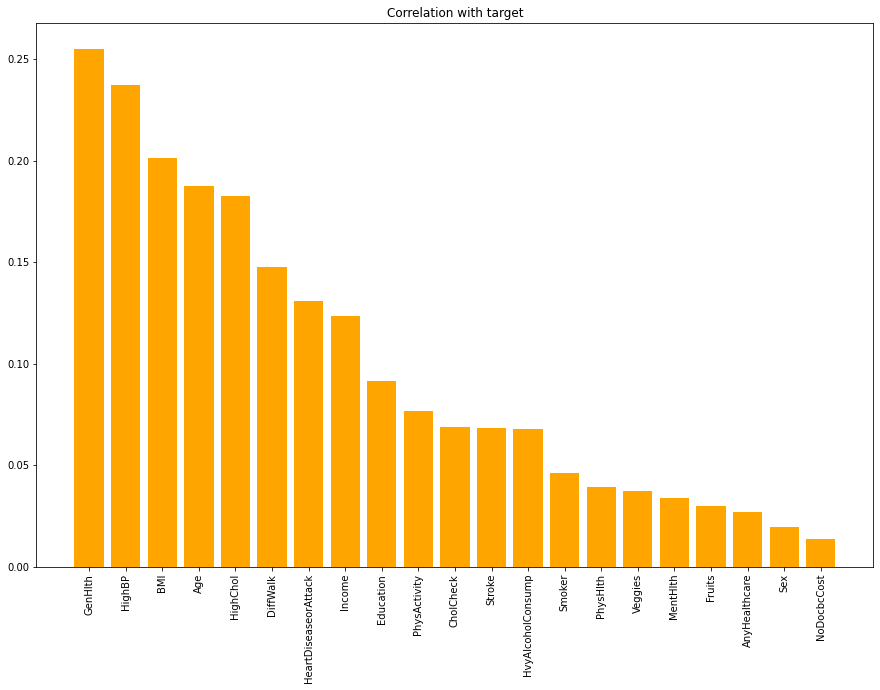

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.bar(range(len(result_1['correlation'])),result_1['correlation'], align='center', color='orange')
plt.title("Correlation with target")
plt.xticks(range(len(result_1['Features'])), result_1['Features'], rotation='vertical')
figure= plt.gcf()
figure.set_size_inches(15,10)
plt.show()

chọn x và y

In [ ]:
df6 = df5.copy()
x = df6.drop(labels =['Diabetes_012','NoDocbcCost','Sex','AnyHealthcare','Fruits'],
             axis = 1)
y = df6['Diabetes_012']

chia tập train test

sklearn

In [ ]:
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size = 0.3,random_state=42)
print(x_train_1.shape)
print(x_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(6644, 17)
(2848, 17)
(6644,)
(2848,)


hàm tự tạo

In [ ]:
def split_train_test(X,Y, fr, st):
    X_train = X.sample(frac = fr, random_state = st)
    X_test = X.drop(X_train.index)

    Y_train = Y.sample(frac = fr, random_state = st)
    Y_test = Y.drop(Y_train.index)

    return X_train, Y_train, X_test, Y_test



In [ ]:
def train_test_split(X, y, test_size = 0.1):
    i = int((1 - test_size) * X.shape[0])
    o = np.random.permutation(X.shape[0])

    X_train, X_test = np.split(np.take(X,o,axis=0), [i])
    y_train, y_test = np.split(np.take(y,o), [i])
    return X_train, X_test, y_train, y_test

In [ ]:
x_train, y_train, x_test, y_test= split_train_test(x, y,0.7,10)

tạo mảng để chứa điểm của từng thuật toán

In [ ]:
Score = []
skscore = []
Regression = ['LogisticRegression','K-Nearest Neighbors','DecisionTree','Naive Bayes']

In [ ]:
def score(y_test,pred):
    T = 0
    F = 0
    for i in range(len(y_test)):
        if (y_test[i]==pred[i]):
            T += 1
        else:
            F += 1
    return (100*(T)/(T+F))

In [ ]:
train_x = x_train.copy().to_numpy()
train_y = y_train.copy().to_numpy()
test_x = x_test.copy().to_numpy()
test_y = y_test.copy().to_numpy()

logistic


In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [ ]:
clf = LogisticRegression(lr=0.01)
clf.fit(x_train, y_train)
y_pred_1 = clf.predict(x_test)


In [ ]:
score_1 = score(test_y,y_pred_1)
print('Accuracy of model: ',score_1)

Score.append(score_1)


Accuracy of model:  84.05898876404494


sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lireg = LogisticRegression()
lireg.fit(x_train,y_train)
y_pred_test = lireg.predict(x_test)
skscore_1=accuracy_score(y_test, y_pred_test)
print('sklearn score : ',skscore_1)
skscore.append(skscore_1)

sklearn score :  0.8595505617977528


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


knn code chay

In [ ]:
def minkowski_distance(a, b, p=1):
    dim = len(a)
    distance = 0
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
    distance = distance**(1/p)
    return distance

In [ ]:
def knn_predict(x_train, x_test, y_train, y_test, k, p):
    from collections import Counter
    y_hat_test = []
    for test_point in x_test:
        distances = []
        for train_point in x_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        df_dists = pd.DataFrame(data=distances, columns=['dist'],
                                index=y_train.index)
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[df_nn.index])
        prediction = counter.most_common()[0][0]
        y_hat_test.append(prediction)
    return y_hat_test

In [ ]:
y_pred_2 = knn_predict(train_x, test_x, y_train, y_test, k=5, p=1)

In [ ]:
score_2 = score(test_y,y_pred_2)
print('Accuracy of model: ',score_2)
Score.append(score_2)

KNN sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, p=1)
clf.fit(x_train, y_train)
y_pred_test_2 = clf.predict(x_test)
skscore_2 = accuracy_score(y_test, y_pred_test_2)
print('sklearn score : ',skscore_2)
skscore.append(skscore_2)


DecisionTree

In [ ]:
from collections import Counter
class Node:
    def __init__(self, feature=None, threshold=None, data_left=None, data_right=None, gain=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.data_left = data_left
        self.data_right = data_right
        self.gain = gain
        self.value = value
class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None

    @staticmethod
    def _entropy(s):


        counts = np.bincount(np.array(s, dtype=np.int64))

        percentages = counts / len(s)

        entropy = 0
        for pct in percentages:
            if pct > 0:
                entropy += pct * np.log2(pct)
        return -entropy

    def _information_gain(self, parent, left_child, right_child):

        num_left = len(left_child) / len(parent)
        num_right = len(right_child) / len(parent)

        return self._entropy(parent) - (num_left * self._entropy(left_child) + num_right * self._entropy(right_child))

    def _best_split(self, X, y):

        best_split = {}
        best_info_gain = -1
        n_rows, n_cols = X.shape

        for f_idx in range(n_cols):
            X_curr = X[:, f_idx]
            for threshold in np.unique(X_curr):
                df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
                df_left = np.array([row for row in df if row[f_idx] <= threshold])
                df_right = np.array([row for row in df if row[f_idx] > threshold])

                if len(df_left) > 0 and len(df_right) > 0:
                    y = df[:, -1]
                    y_left = df_left[:, -1]
                    y_right = df_right[:, -1]

                    gain = self._information_gain(y, y_left, y_right)
                    if gain > best_info_gain:
                        best_split = {
                            'feature_index': f_idx,
                            'threshold': threshold,
                            'df_left': df_left,
                            'df_right': df_right,
                            'gain': gain
                        }
                        best_info_gain = gain
        return best_split

    def _build(self, X, y, depth=0):

        n_rows, n_cols = X.shape

        if n_rows >= self.min_samples_split and depth <= self.max_depth:

            best = self._best_split(X, y)

            if best['gain'] > 0:

                left = self._build(
                    X=best['df_left'][:, :-1],
                    y=best['df_left'][:, -1],
                    depth=depth + 1
                )
                right = self._build(
                    X=best['df_right'][:, :-1],
                    y=best['df_right'][:, -1],
                    depth=depth + 1
                )
                return Node(
                    feature=best['feature_index'],
                    threshold=best['threshold'],
                    data_left=left,
                    data_right=right,
                    gain=best['gain']
                )

        return Node(
            value=Counter(y).most_common(1)[0][0]
        )

    def fit(self, X, y):
        self.root = self._build(X, y)

    def _predict(self, x, tree):
        if tree.value != None:
            return tree.value
        feature_value = x[tree.feature]

        if feature_value <= tree.threshold:
            return self._predict(x=x, tree=tree.data_left)

        if feature_value > tree.threshold:
            return self._predict(x=x, tree=tree.data_right)

    def predict(self, X):
        return [self._predict(x, self.root) for x in X]

In [ ]:
model = DecisionTree()

model.fit(train_x,train_y )

y_pred_3 = model.predict(test_x)


In [ ]:
score_3 = score(test_y,y_pred_3)
print('Accuracy of model: ',score_3)

Score.append(score_3)

sklearn

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state = 42)

model.fit(x_train, y_train)
y_pred_test_3 = model.predict(x_test)
skscore_3 = accuracy_score(y_test, y_pred_test_3)
print('sklearn score : ',skscore_3)
skscore.append(skscore_3)

Naive Bayes

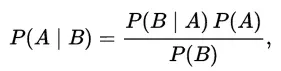

tính P(Y=y)

In [ ]:
def calculate_prior(Y_train):
    classes = sorted(list(Y_train.unique()))
    prior = []
    for i in classes:
        prior.append(len(Y_train[Y_train==i])/len(df))
    return prior

Tính P(X=x|Y=y)

In [ ]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y


Tính P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) với mọi y và tìm giá trị lớn nhất

In [ ]:
def naive_bayes_categorical(X_train,Y_train, X_test):
    # lấy tên feature
    features = list(X_train.columns)

    # tính prior
    prior = calculate_prior(Y_train)
    Y = Y_train.name
    df = pd.concat([X_train, Y_train], axis=1)
    Y_pred = []
    # lặp qua mọi mẫu dữ liệu
    for x in X_test:
        # tính toán khả năng
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # tính toán xác suất
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [ ]:
y_pred_4 = naive_bayes_categorical(x_train,y_train, X_test=test_x)
print(y_pred_4)

[0 0 2 ... 0 0 2]


In [ ]:
score_4 = score(test_y,y_pred_4)
print('Accuracy of model: ',score_4)

Score.append(score_4)

Accuracy of model:  82.58426966292134


sklearn

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)
y_pred_test_4 = model.predict(x_test)

skscore_4 = accuracy_score(y_test, y_pred_test_4)
print('sklearn score : ',skscore_4)
skscore.append(skscore_4)

sklearn score :  0.8595505617977528


In [ ]:
print(skscore)

[0.8595505617977528, 0.8458567415730337, 0.8620084269662921, 0.8595505617977528]


In [ ]:
regression = pd.DataFrame({'Regression': Regression,'Score': Score})
regression_2 = pd.DataFrame({'Regression': Regression,'Score': Score,'Sklearn':skscore})
print(regression)
print(regression_2)

            Regression      Score
0   LogisticRegression  84.058989
1  K-Nearest Neighbors  84.339888
2         DecisionTree  85.147472
3          Naive Bayes  82.584270
            Regression      Score   Sklearn
0   LogisticRegression  84.058989  0.859551
1  K-Nearest Neighbors  84.339888  0.845857
2         DecisionTree  85.147472  0.862008
3          Naive Bayes  82.584270  0.859551


In [ ]:
regression.to_csv('Regression.csv', index=False)

In [ ]:
regression_1 = regression.sort_values('Score',ascending=False).reset_index()

print(regression_1.head(1))

   index    Regression      Score
0      2  DecisionTree  85.147472


In [ ]:
kq = pd.DataFrame({"True label ":test_y,'Pred':y_pred_3})

In [ ]:
display(kq)

,True label,Pred
0,0,0.0
1,0,0.0
2,2,0.0
3,2,0.0
4,2,0.0
...,...,...
2843,0,0.0
2844,0,0.0
2845,0,0.0
2846,0,0.0
